In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
from PIL import Image
from torchvision import transforms
import random
import shutil

original_dir = "/kaggle/input/leukemia/Original"
working_dir = "/kaggle/working/leukemia_balanced"

# Copy dataset if not copied already
if not os.path.exists(working_dir):
    shutil.copytree(original_dir, working_dir)
    print("✅ Dataset copied to working directory:", working_dir)
else:
    print("⚠️ Working directory already exists, using existing copy.")

data_dir = working_dir
# Detect class folders
class_folders = {cls: os.path.join(data_dir, cls) for cls in os.listdir(data_dir)}

# Count images in each class
class_counts = {cls: len(os.listdir(path)) for cls, path in class_folders.items()}
print("📊 Class Counts (Before Augmentation):", class_counts)

# Calculate target count as average of all classes (excluding the minority class when calculating)
class_counts_list = list(class_counts.values())
average_count = int(sum(class_counts_list) / len(class_counts_list))
print(f"🎯 Target count per class (average): {average_count}")

# Offline augmentation transforms (STRONG Augmentations)
offline_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(degrees=30),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.5, 1.0)), # Add zoom & cropping
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.3),
    transforms.GaussianBlur(kernel_size=3),
    transforms.RandomAffine(degrees=0, shear=20),  # Added shear for more variety
])

# Perform offline augmentation - only augment classes that are below average
for cls, folder in class_folders.items():
    current_count = class_counts[cls]
    
    # Only augment if current count is less than average
    if current_count < average_count:
        images = os.listdir(folder)
        target_for_this_class = average_count  # Target is the average count
        
        while len(images) < target_for_this_class:
            img_name = random.choice(images)
            img_path = os.path.join(folder, img_name)

            img = Image.open(img_path).convert("RGB")
            augmented_img = offline_transform(img)

            new_file = f"aug_{len(images)}_{img_name}"
            augmented_img.save(os.path.join(folder, new_file))

            images.append(new_file)

        print(f"✅ Class '{cls}' augmented from {current_count} to {len(images)} images.")
    else:
        print(f"ℹ️  Class '{cls}' already has {current_count} images (≥ average {average_count}), no augmentation needed.")

# Print final counts
final_counts = {cls: len(os.listdir(path)) for cls, path in class_folders.items()}
print("\n📊 Final Class Counts (After Augmentation):", final_counts)
print("🎉 Offline augmentation completed! Dataset balanced to average.\n")

✅ Dataset copied to working directory: /kaggle/working/leukemia_balanced
📊 Class Counts (Before Augmentation): {'Benign': 504, 'Pre': 963, 'Pro': 804, 'Early': 985}
🎯 Target count per class (average): 814
✅ Class 'Benign' augmented from 504 to 814 images.
ℹ️  Class 'Pre' already has 963 images (≥ average 814), no augmentation needed.
✅ Class 'Pro' augmented from 804 to 814 images.
ℹ️  Class 'Early' already has 985 images (≥ average 814), no augmentation needed.

📊 Final Class Counts (After Augmentation): {'Benign': 814, 'Pre': 963, 'Pro': 814, 'Early': 985}
🎉 Offline augmentation completed! Dataset balanced to average.



Epoch 1/50, Train Loss: 1.3538, Train Acc: 36.00%, Val Loss: 1.0983, Val Acc: 71.75%
Epoch 2/50, Train Loss: 1.0300, Train Acc: 64.40%, Val Loss: 0.8536, Val Acc: 80.98%
Epoch 3/50, Train Loss: 0.8262, Train Acc: 76.67%, Val Loss: 0.6980, Val Acc: 86.15%
Epoch 4/50, Train Loss: 0.6974, Train Acc: 81.14%, Val Loss: 0.5957, Val Acc: 86.99%
Epoch 5/50, Train Loss: 0.6108, Train Acc: 83.54%, Val Loss: 0.5219, Val Acc: 88.81%
Epoch 6/50, Train Loss: 0.5450, Train Acc: 85.34%, Val Loss: 0.4659, Val Acc: 90.35%
Epoch 7/50, Train Loss: 0.4941, Train Acc: 86.46%, Val Loss: 0.4207, Val Acc: 90.49%
Epoch 8/50, Train Loss: 0.4461, Train Acc: 87.73%, Val Loss: 0.3854, Val Acc: 91.75%
Epoch 9/50, Train Loss: 0.4133, Train Acc: 89.01%, Val Loss: 0.3549, Val Acc: 92.31%
Epoch 10/50, Train Loss: 0.3830, Train Acc: 89.81%, Val Loss: 0.3288, Val Acc: 93.15%
Epoch 11/50, Train Loss: 0.3689, Train Acc: 90.21%, Val Loss: 0.3064, Val Acc: 93.71%
Epoch 12/50, Train Loss: 0.3425, Train Acc: 91.13%, Val Loss: 0

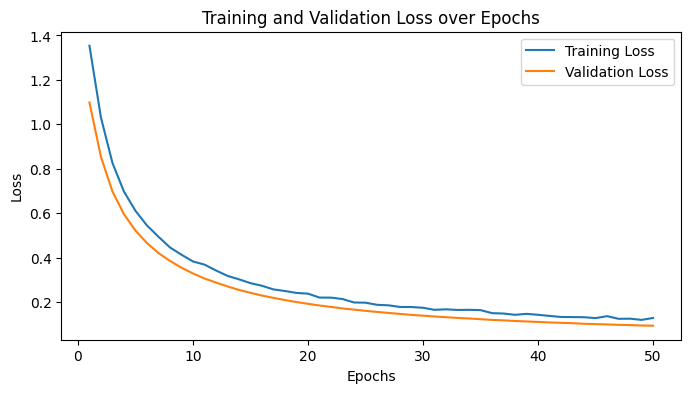

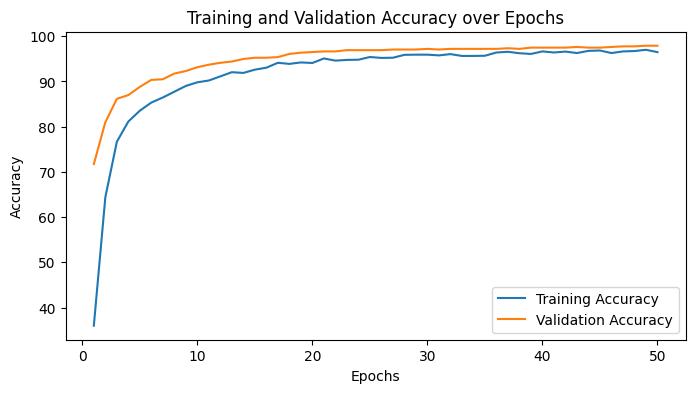

Test Loss: 0.0848, Test Acc: 98.04%
Confusion Matrix:
[[ 65   1   0   1]
 [  2 110   0   0]
 [  0   1  99   0]
 [  2   0   0  77]]


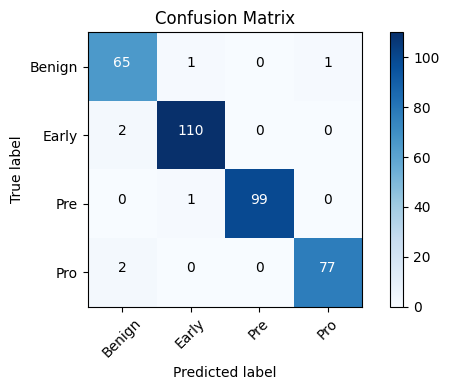

Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.97      0.96        67
       Early       0.98      0.98      0.98       112
         Pre       1.00      0.99      0.99       100
         Pro       0.99      0.97      0.98        79

    accuracy                           0.98       358
   macro avg       0.98      0.98      0.98       358
weighted avg       0.98      0.98      0.98       358



In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.models import ViT_B_16_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Define hyperparameters
batch_size = 32
num_epochs = 50 # Maximum epochs, but we'll use early stopping
learning_rate = 1e-4
weight_decay = 1e-4 # L2 regularization to help prevent overfitting
patience = 3 # For early stopping
num_classes = 4
dropout_rate = 0.5  # Dropout rate to help prevent overfitting


# Data augmentation and normalization for training
# Augmentation helps prevent overfitting by increasing dataset variety
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224), # ViT input size
    transforms.RandomHorizontalFlip(),
    #transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    #transforms.GaussianBlur(kernel_size=3),
   # transforms.RandomAffine(degrees=0, shear=20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # ImageNet stats
])
# For validation and test, no augmentation
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# Load the full dataset
# Assume your dataset is in 'path/to/dataset' with subfolders for each class
data_dir = '/kaggle/working/leukemia_balanced' # Replace with your actual path
full_dataset = datasets.ImageFolder(data_dir, transform=None) # We'll apply transforms later
# Calculate split sizes
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size


# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])
# Apply transforms to each split
# We apply transforms after splitting to ensure consistency, but since transforms are random, it's fine
# For reproducibility, you can set seeds
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform



# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


# Load pre-trained Vision Transformer
model = models.vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
# Freeze the base layers to prevent overfitting initially (feature extraction)
for param in model.parameters():
    param.requires_grad = False
# Get the input features for the classifier head
in_features = model.heads.head.in_features
# Replace the classifier head with dropout and linear layer for our 4 classes
model.heads = nn.Sequential(
    nn.Dropout(p=dropout_rate),
    nn.Linear(in_features, num_classes)
)
# Unfreeze the head
for param in model.heads.parameters():
    param.requires_grad = True
# Optionally, unfreeze some top layers for fine-tuning
# For example, unfreeze the last encoder layer
# model.encoder.layers[-1].requires_grad = True # Adjust as needed


# Move model to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# Loss function
criterion = nn.CrossEntropyLoss()
# Optimizer with weight decay for regularization
optimizer = optim.Adam(model.heads.parameters(), lr=learning_rate, weight_decay=weight_decay) # Only optimize head initially
# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)
# Early stopping variables
best_val_loss = float('inf')
epochs_no_improve = 0
# Lists to store losses and accuracies
train_losses = []
val_losses = []
train_accs = []
val_accs = []
# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    train_loss = running_loss / len(train_loader)
    train_acc = 100 * train_correct / train_total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss /= len(val_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
    # Learning rate scheduler step
    scheduler.step(val_loss)
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        # Save best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
# Plot training and validation loss
plt.figure(figsize=(8,4))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()
# Plot training and validation accuracy
plt.figure(figsize=(8,4))
plt.plot(range(1, len(train_accs)+1), train_accs, label='Training Accuracy')
plt.plot(range(1, len(val_accs)+1), val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()
plt.show()



# Load best model for testing
model.load_state_dict(torch.load('best_model.pth'))
# Test the model
model.eval()
test_loss = 0.0
correct = 0
total = 0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
test_loss /= len(test_loader)
test_acc = 100 * correct / total
print(f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')
# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(cm)
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
# Get class names
class_names = full_dataset.classes
plot_confusion_matrix(cm, class_names)
# Classification report
print('Classification Report:')
print(classification_report(all_labels, all_preds, target_names=class_names))

Downloading: "https://download.pytorch.org/models/swin_b-68c6b09e.pth" to /root/.cache/torch/hub/checkpoints/swin_b-68c6b09e.pth
100%|██████████| 335M/335M [00:01<00:00, 212MB/s]  


[SWIN] Epoch 1/50 | Train Loss: 1.2489 | Train Acc: 45.71% | Val Loss: 1.0227 | Val Acc: 76.50%
[SWIN] Epoch 2/50 | Train Loss: 1.0062 | Train Acc: 68.40% | Val Loss: 0.8172 | Val Acc: 80.42%
[SWIN] Epoch 3/50 | Train Loss: 0.8468 | Train Acc: 76.95% | Val Loss: 0.6886 | Val Acc: 81.40%
[SWIN] Epoch 4/50 | Train Loss: 0.7438 | Train Acc: 78.39% | Val Loss: 0.5961 | Val Acc: 83.50%
[SWIN] Epoch 5/50 | Train Loss: 0.6786 | Train Acc: 80.02% | Val Loss: 0.5370 | Val Acc: 83.78%
[SWIN] Epoch 6/50 | Train Loss: 0.6206 | Train Acc: 81.42% | Val Loss: 0.4909 | Val Acc: 84.76%
[SWIN] Epoch 7/50 | Train Loss: 0.5871 | Train Acc: 82.02% | Val Loss: 0.4545 | Val Acc: 86.01%
[SWIN] Epoch 8/50 | Train Loss: 0.5515 | Train Acc: 83.10% | Val Loss: 0.4275 | Val Acc: 86.01%
[SWIN] Epoch 9/50 | Train Loss: 0.5137 | Train Acc: 83.70% | Val Loss: 0.4017 | Val Acc: 86.57%
[SWIN] Epoch 10/50 | Train Loss: 0.5017 | Train Acc: 84.66% | Val Loss: 0.3830 | Val Acc: 86.85%
[SWIN] Epoch 11/50 | Train Loss: 0.4816

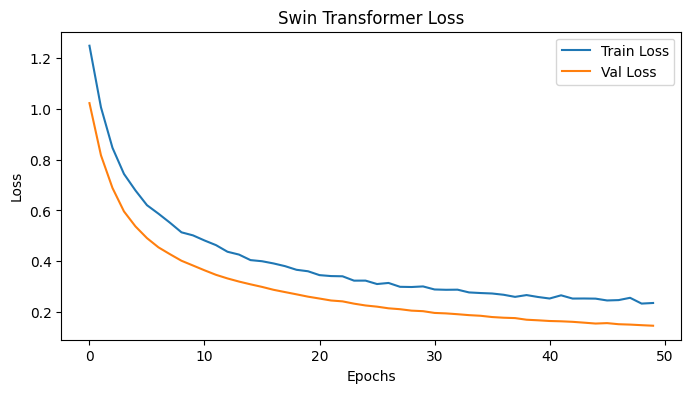

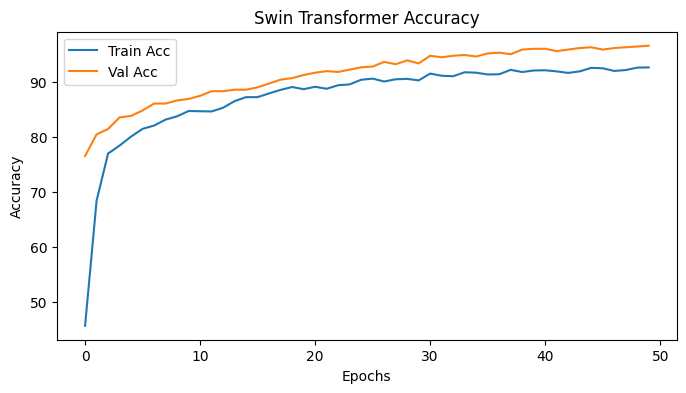

[SWIN] Test Loss: 0.1626, Test Acc: 96.93%
[[ 60   3   0   0]
 [  1  95   0   2]
 [  0   3 100   1]
 [  1   0   0  92]]


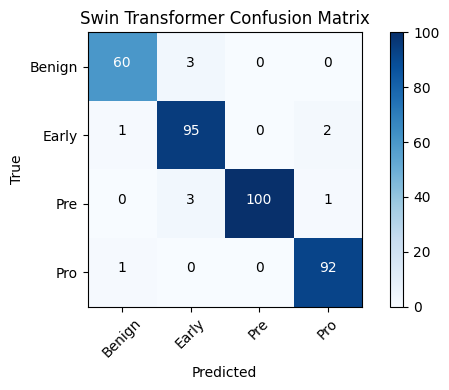

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.95      0.96        63
       Early       0.94      0.97      0.95        98
         Pre       1.00      0.96      0.98       104
         Pro       0.97      0.99      0.98        93

    accuracy                           0.97       358
   macro avg       0.97      0.97      0.97       358
weighted avg       0.97      0.97      0.97       358



In [5]:
# ================================================================
# Swin Transformer (swin_b) – Same Settings for Fair Comparison
# ================================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.models import Swin_B_Weights
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Load Swin Transformer (pretrained)
swin_model = models.swin_b(weights=Swin_B_Weights.IMAGENET1K_V1)

# Freeze backbone parameters
for param in swin_model.parameters():
    param.requires_grad = False

# Replace the Swin classifier head
in_features = swin_model.head.in_features
swin_model.head = nn.Sequential(
    nn.Dropout(p=dropout_rate),           # same dropout rate as ViT
    nn.Linear(in_features, num_classes)
)

# Unfreeze classifier parameters
for param in swin_model.head.parameters():
    param.requires_grad = True

# Move to device
swin_model.to(device)

# Loss & optimizer (same as ViT)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(swin_model.head.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1)

# Early stopping variables
best_val_loss = float('inf')
epochs_no_improve = 0

# History lists
swin_train_losses = []
swin_val_losses = []
swin_train_accs = []
swin_val_accs = []

# =========================
# TRAINING LOOP (same)
# =========================
for epoch in range(num_epochs):
    swin_model.train()
    running_loss = 0
    train_correct = 0
    train_total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = swin_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * train_correct / train_total

    swin_train_losses.append(train_loss)
    swin_train_accs.append(train_acc)

    # Validation
    swin_model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = swin_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    swin_val_losses.append(val_loss)
    swin_val_accs.append(val_acc)

    print(f"[SWIN] Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")

    # Scheduler & Early Stopping
    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(swin_model.state_dict(), "best_swin_model.pth")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break

# =========================
# PLOT TRAIN/VAL CURVES
# =========================
plt.figure(figsize=(8,4))
plt.plot(swin_train_losses, label='Train Loss')
plt.plot(swin_val_losses, label='Val Loss')
plt.title("Swin Transformer Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(swin_train_accs, label='Train Acc')
plt.plot(swin_val_accs, label='Val Acc')
plt.title("Swin Transformer Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# =========================
# TESTING
# =========================
swin_model.load_state_dict(torch.load("best_swin_model.pth"))
swin_model.eval()

test_loss = 0.0
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = swin_model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss /= len(test_loader)
test_acc = 100 * correct / total

print(f"[SWIN] Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
print(cm)

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6,4))
    plt.imshow(cm, cmap="Blues")
    plt.title("Swin Transformer Confusion Matrix")
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=45)
    plt.yticks(ticks, classes)
    thresh = cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i,j], ha="center", color="white" if cm[i,j]>thresh else "black")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, class_names)

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))


Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-c5b4e57e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-c5b4e57e.pth
100%|██████████| 255M/255M [00:01<00:00, 203MB/s]  


Epoch 1/50 | Train Loss: 1.2720 | Train Acc: 51.46% | Val Loss: 1.2919 | Val Acc: 55.80%
Epoch 2/50 | Train Loss: 1.0584 | Train Acc: 76.35% | Val Loss: 1.0914 | Val Acc: 68.95%
Epoch 3/50 | Train Loss: 0.8944 | Train Acc: 84.34% | Val Loss: 0.8625 | Val Acc: 80.42%
Epoch 4/50 | Train Loss: 0.7865 | Train Acc: 85.90% | Val Loss: 0.7085 | Val Acc: 86.57%
Epoch 5/50 | Train Loss: 0.6929 | Train Acc: 87.73% | Val Loss: 0.6180 | Val Acc: 88.11%
Epoch 6/50 | Train Loss: 0.6420 | Train Acc: 88.49% | Val Loss: 0.5594 | Val Acc: 89.79%
Epoch 7/50 | Train Loss: 0.5755 | Train Acc: 90.29% | Val Loss: 0.5135 | Val Acc: 91.05%
Epoch 8/50 | Train Loss: 0.5397 | Train Acc: 89.65% | Val Loss: 0.4753 | Val Acc: 91.61%
Epoch 9/50 | Train Loss: 0.4902 | Train Acc: 91.45% | Val Loss: 0.4409 | Val Acc: 92.03%
Epoch 10/50 | Train Loss: 0.4685 | Train Acc: 91.21% | Val Loss: 0.4140 | Val Acc: 92.45%
Epoch 11/50 | Train Loss: 0.4478 | Train Acc: 90.89% | Val Loss: 0.3896 | Val Acc: 92.59%
Epoch 12/50 | Train

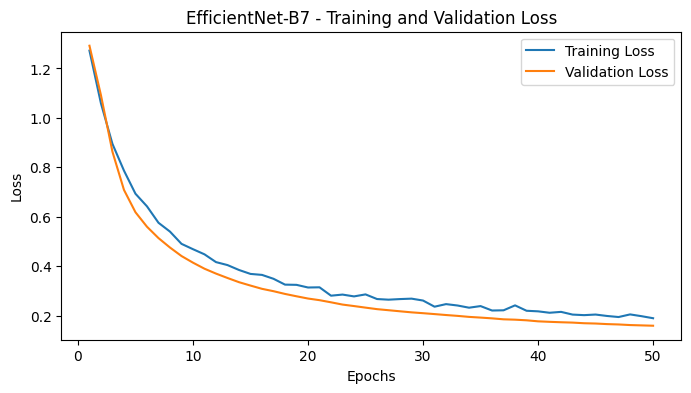

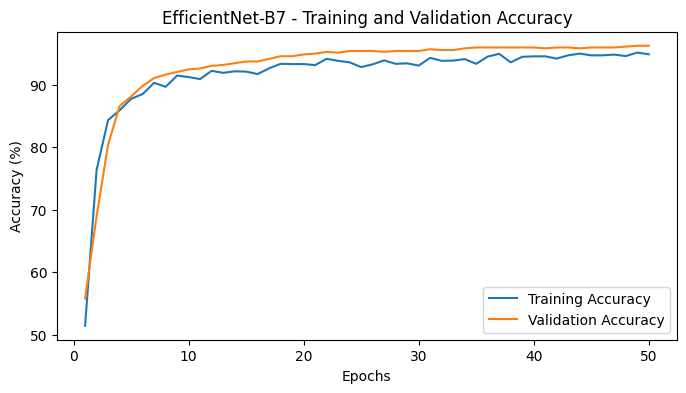


EfficientNet-B7 Test Loss: 0.1436 | Test Accuracy: 95.81%

Confusion Matrix:
[[65  3  1  0]
 [ 7 93  0  0]
 [ 1  1 95  1]
 [ 1  0  0 90]]


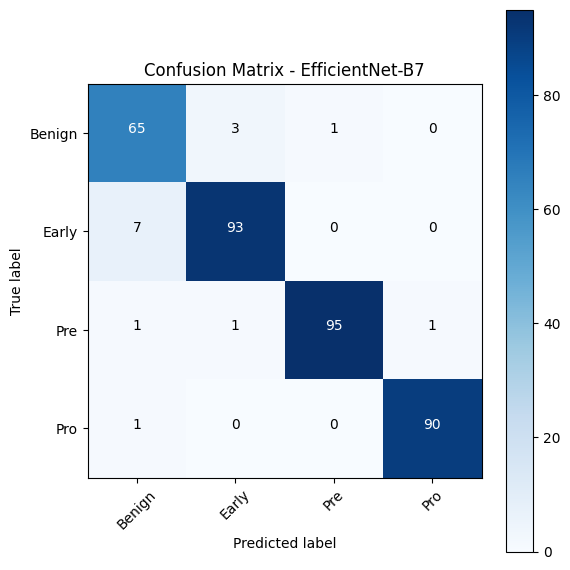

Classification Report:
              precision    recall  f1-score   support

      Benign       0.88      0.94      0.91        69
       Early       0.96      0.93      0.94       100
         Pre       0.99      0.97      0.98        98
         Pro       0.99      0.99      0.99        91

    accuracy                           0.96       358
   macro avg       0.95      0.96      0.96       358
weighted avg       0.96      0.96      0.96       358



In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.models import EfficientNet_B7_Weights
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Define hyperparameters (exactly the same as your ViT script for fair comparison)
batch_size = 32
num_epochs = 50  # Maximum epochs, but we'll use early stopping
learning_rate = 1e-4
weight_decay = 1e-4  # L2 regularization
patience = 3  # For early stopping
num_classes = 4
dropout_rate = 0.5  # Same dropout rate as ViT script

# Data augmentation and normalization (kept identical to ViT script, including 224×224 input size)
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the full dataset
data_dir = '/kaggle/working/leukemia_balanced'  # Keep your path
full_dataset = datasets.ImageFolder(data_dir, transform=None)

# Split exactly the same way
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_test_transform
test_dataset.dataset.transform = val_test_transform

# Data loaders (identical)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Load pre-trained EfficientNet-B7 (ImageNet-1K weights)
model = models.efficientnet_b7(weights=EfficientNet_B7_Weights.IMAGENET1K_V1)

# Freeze all parameters (feature extraction mode - exactly like ViT script)
for param in model.parameters():
    param.requires_grad = False

# Replace classifier head (same structure as ViT script: Dropout + Linear)
in_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(p=dropout_rate),
    nn.Linear(in_features, num_classes)
)

# Unfreeze only the new head (exactly like ViT script)
for param in model.classifier.parameters():
    param.requires_grad = True

# Move to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Loss, optimizer (only on classifier head - identical to ViT), scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# Early stopping variables
best_val_loss = float('inf')
epochs_no_improve = 0

# Lists to store metrics
train_losses = []
val_losses = []
train_accs = []
val_accs = []

# Training loop (100% identical structure to your ViT script)
for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    val_loss /= len(val_loader)
    val_acc = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f'Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%')
    
    # Scheduler step
    scheduler.step(val_loss)
    
    # Early stopping (identical logic)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), 'best_efficientnet_b7.pth')  # Changed name so you don't overwrite ViT model
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

# Plot loss
plt.figure(figsize=(8,4))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('EfficientNet-B7 - Training and Validation Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(8,4))
plt.plot(range(1, len(train_accs)+1), train_accs, label='Training Accuracy')
plt.plot(range(1, len(val_accs)+1), val_accs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('EfficientNet-B7 - Training and Validation Accuracy')
plt.legend()
plt.show()

# Load best model and evaluate on test set
model.load_state_dict(torch.load('best_efficientnet_b7.pth'))
model.eval()

test_loss = 0.0
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss /= len(test_loader)
test_acc = 100 * correct / total

print(f'\nEfficientNet-B7 Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2f}%')

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
print('\nConfusion Matrix:')
print(cm)

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - EfficientNet-B7')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

class_names = full_dataset.classes
plot_confusion_matrix(cm, class_names)

# Classification report
print('Classification Report:')
print(classification_report(all_labels, all_preds, target_names=class_names))

✓ best_model.pth loaded successfully!
✓ Running evaluation on 10% test dataset...

===== TEST RESULTS =====
Test Loss: 0.0968
Test Accuracy: 98.04%

Confusion Matrix:
[[78  1  0  1]
 [ 1 98  0  0]
 [ 0  3 98  0]
 [ 1  0  0 77]]


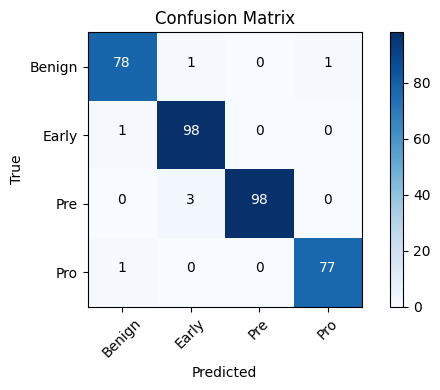


Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        80
       Early       0.96      0.99      0.98        99
         Pre       1.00      0.97      0.98       101
         Pro       0.99      0.99      0.99        78

    accuracy                           0.98       358
   macro avg       0.98      0.98      0.98       358
weighted avg       0.98      0.98      0.98       358


==================== EXTRA EVALUATION METRICS ====================

Precision (Macro): 0.9807409502262443
Recall (Macro): 0.9805938766953619
F1-Score (Macro): 0.9805571221011294
Precision (Weighted): 0.9807755504436412
Recall (Weighted): 0.9804469273743017
F1-Score (Weighted): 0.9804879898533776
Balanced Accuracy: 0.9805938766953619
Cohen's Kappa: 0.9738096233435057
Matthews Correlation Coefficient: 0.9739012285947918
Hamming Loss: 0.019553072625698324
Jaccard Score (Macro): 0.9619140992203753
Jaccard Score (Weighted): 0.9617794753871

In [12]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
from torchvision.models import ViT_B_16_Weights
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# ===============================================
#               SAME SETTINGS
# ===============================================
batch_size = 32
num_classes = 4
dropout_rate = 0.5

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ===============================================
#        SAME TRANSFORMS AS TRAINING
# ===============================================
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# ===============================================
#                   DATASET
# ===============================================
data_dir = '/kaggle/working/leukemia_balanced'   # <-- CHANGE IF NEEDED
full_dataset = datasets.ImageFolder(data_dir, transform=None)

total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size   = int(0.2 * total_size)
test_size  = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size]
)

# Only test dataset used here → apply correct transform
test_dataset.dataset.transform = val_test_transform

test_loader = DataLoader(test_dataset, batch_size=batch_size,
                         shuffle=False, num_workers=4)

# ===============================================
#          RECREATE YOUR TRAINED MODEL
# ===============================================
model = models.vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace classifier head EXACTLY as in training
in_features = model.heads.head.in_features
model.heads = nn.Sequential(
    nn.Dropout(p=dropout_rate),
    nn.Linear(in_features, num_classes)
)

model.to(device)

# ===============================================
#          LOAD SAVED WEIGHTS
# ===============================================
model.load_state_dict(torch.load("best_model.pth", map_location=device))
model.eval()

print("✓ best_model.pth loaded successfully!")
print("✓ Running evaluation on 10% test dataset...")

criterion = nn.CrossEntropyLoss()

# ===============================================
#               TESTING LOOP
# ===============================================
test_loss = 0.0
correct = 0
total = 0

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_loss /= len(test_loader)
test_acc = 100 * correct / total

print(f"\n===== TEST RESULTS =====")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}%")

# ===============================================
#        CONFUSION MATRIX + PLOTTING
# ===============================================
cm = confusion_matrix(all_labels, all_preds)
print("\nConfusion Matrix:")
print(cm)

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=45)
    plt.yticks(ticks, classes)

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

class_names = full_dataset.classes
plot_confusion_matrix(cm, class_names)

print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))



from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score,
    top_k_accuracy_score, hamming_loss, jaccard_score
)

# Convert to numpy arrays
y_true = np.array(all_labels)
y_pred = np.array(all_preds)

print("\n==================== EXTRA EVALUATION METRICS ====================\n")

# ------------------------------------------------------------------
# 1. Precision, Recall, F1 Scores
# ------------------------------------------------------------------
print("Precision (Macro):", precision_score(y_true, y_pred, average='macro'))
print("Recall (Macro):", recall_score(y_true, y_pred, average='macro'))
print("F1-Score (Macro):", f1_score(y_true, y_pred, average='macro'))

print("Precision (Weighted):", precision_score(y_true, y_pred, average='weighted'))
print("Recall (Weighted):", recall_score(y_true, y_pred, average='weighted'))
print("F1-Score (Weighted):", f1_score(y_true, y_pred, average='weighted'))

# ------------------------------------------------------------------
# 2. Balanced Accuracy
# ------------------------------------------------------------------
print("Balanced Accuracy:", balanced_accuracy_score(y_true, y_pred))

# ------------------------------------------------------------------
# 3. Cohen's Kappa
# ------------------------------------------------------------------
print("Cohen's Kappa:", cohen_kappa_score(y_true, y_pred))

# ------------------------------------------------------------------
# 4. Matthews Correlation Coefficient (MCC)
# ------------------------------------------------------------------
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_true, y_pred))

# ------------------------------------------------------------------
# 5. Hamming Loss
# ------------------------------------------------------------------
print("Hamming Loss:", hamming_loss(y_true, y_pred))

# ------------------------------------------------------------------
# 6. Jaccard Score (Macro + Weighted)
# ------------------------------------------------------------------
print("Jaccard Score (Macro):", jaccard_score(y_true, y_pred, average='macro'))
print("Jaccard Score (Weighted):", jaccard_score(y_true, y_pred, average='weighted'))

# ------------------------------------------------------------------
# 7. Top-k Accuracy (k = 2, 3) — useful for medical models
# ------------------------------------------------------------------
# Need softmax probabilities for this
model.eval()
all_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        all_probs.extend(probs)

all_probs = np.array(all_probs)

print("Top-2 Accuracy:", top_k_accuracy_score(y_true, all_probs, k=2))
print("Top-3 Accuracy:", top_k_accuracy_score(y_true, all_probs, k=3))

# ------------------------------------------------------------------
# 8. ROC-AUC (One-vs-Rest) for multi-class
# ------------------------------------------------------------------
# Convert labels to one-hot encoding
y_true_oh = np.zeros((len(y_true), num_classes))
for i, label in enumerate(y_true):
    y_true_oh[i, label] = 1

try:
    auc_ovo = roc_auc_score(y_true_oh, all_probs, multi_class='ovr')
    print("ROC-AUC (OvR):", auc_ovo)
except:
    print("ROC-AUC: Cannot compute (need probability outputs and >1 class present)")



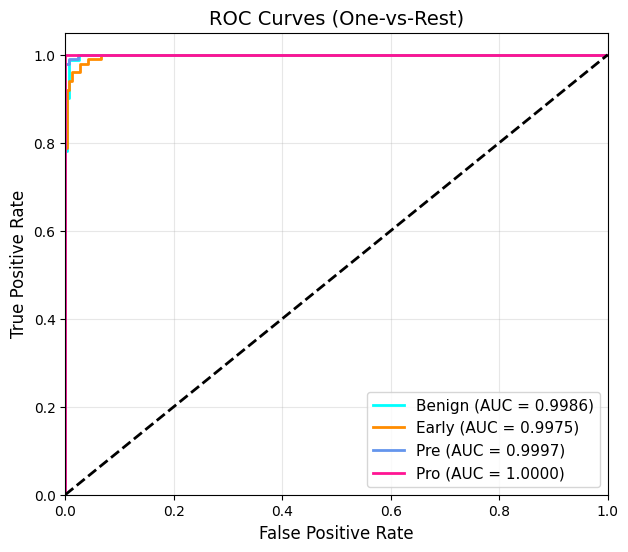

=== Per-class AUC Scores ===
Benign               AUC = 0.9986
Early                AUC = 0.9975
Pre                  AUC = 0.9997
Pro                  AUC = 1.0000


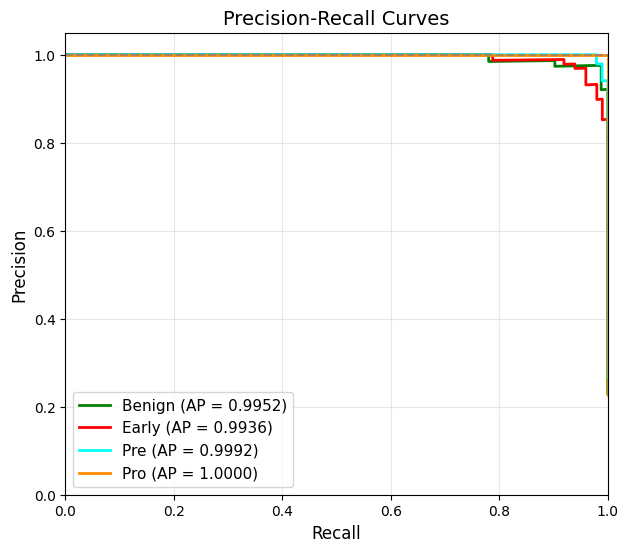

In [11]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from torchvision.models import ViT_B_16_Weights
from torch.utils.data import DataLoader
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# ================================
# SETTINGS (only change these)
# ================================
model_path = 'best_model.pth'
data_dir   = '/kaggle/working/leukemia_balanced'
batch_size = 32
num_classes = 4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ================================
# Test transform (same as training)
# ================================
val_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Re-create the exact same test split
full_dataset = datasets.ImageFolder(data_dir, transform=val_test_transform)
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size   = int(0.2 * total_size)
test_size  = total_size - train_size - val_size

generator = torch.Generator().manual_seed(42)  # reproducible split
_, _, test_dataset = torch.utils.data.random_split(
    full_dataset, [train_size, val_size, test_size], generator=generator)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# ================================
# Rebuild model + load weights
# ================================
model = models.vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
for param in model.parameters():
    param.requires_grad = False

in_features = model.heads.head.in_features
model.heads = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(in_features, num_classes)
)

model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# ================================
# Single inference pass → probabilities
# ================================
all_labels = []
all_probs  = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.numpy())

all_probs  = np.array(all_probs)
all_labels = np.array(all_labels)
class_names = full_dataset.classes

y_true_bin = label_binarize(all_labels, classes=range(num_classes))

# ================================
# 1. ROC Curves — ONLY per-class (no micro/macro)
# ================================
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot only individual classes + chance line
plt.figure(figsize=(7, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'green', 'red'])

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.0,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves (One-vs-Rest)', fontsize=14)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.show()

# Print per-class AUC only
print("=== Per-class AUC Scores ===")
for i in range(num_classes):
    print(f"{class_names[i]:20} AUC = {roc_auc[i]:.4f}")

# ================================
# 2. Precision-Recall Curves — ONLY per-class (no micro/macro)
# ================================
precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], all_probs[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], all_probs[:, i])

# Plot only individual classes
plt.figure(figsize=(7, 6))
for i, color in zip(range(num_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2.0,
             label=f'{class_names[i]} (AP = {average_precision[i]:.4f})')

plt.axhline(y=np.mean([np.max(precision[i]) for i in range(num_classes)]), 
            color='gray', linestyle='--', alpha=0.7, lw=1.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves', fontsize=14)
plt.legend(loc="lower left", fontsize=11)
plt.grid(alpha=0.3)
plt.show()
